In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 10) # выведем больше колонок

В датасете представлены следующие данные:

* Bar id — ID батончика в базе данных
* Company (Maker-if known) — название компании, изготовившей батончик.
* Specific Bean Origin or Bar Name — точное место происхождения какао-бобов.
* Broad Bean Origin — название региона, где были выращены какао-бобы.
* Company Location — страна, в которой произведён шоколадный батончик.
* Bean Type — вид какао-бобов, используемых в батончике.
* REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.
* Review Date — год публикации рецензии.
* Cocoa Percent — процент какао в шоколаде.
* Rating — оценка батончика фокус-группой.


In [2]:
cacao = pd.read_csv('./unit2_data/cacao_flavors.csv')

In [3]:
display(cacao)

,Bar id,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [5]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
Bar id                              1795 non-null int64
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 140.3+ KB


### Задание 2.2.1
Сколько в датасете числовых столбцов?

In [6]:
len(cacao.describe().columns)

4

In [7]:
# cacao.dtypes.unique() # np.delete(cacao.dtypes.unique(),1)
cacao.dtypes.isin([np.dtype(np.int64), np.dtype(np.float64)]).sum()

4

### Задание 2.2.2
Сколько в датасете строковых столбцов?

In [8]:
# cacao.dtypes.unique()
cacao.dtypes.isin([np.dtype(np.object)]).sum()

6

In [9]:
# *********************************************************************************

In [10]:
#cacao.columns.to_series().apply(lambda x: x.lower().replace('\n','_')).values

In [11]:
cacao.columns = pd.Index(['bar_id', 'company',
       'specific_origin', 'ref', 'review_date',
       'cocoa_percent', 'company_location', 'rating', 'bean_type',
       'broad_origin'])

Теперь рассмотрим все 10 (!) столбцов по отдельности. Но мы с вами не боимся рутинной работы, не так ли?



### Bar id


1795


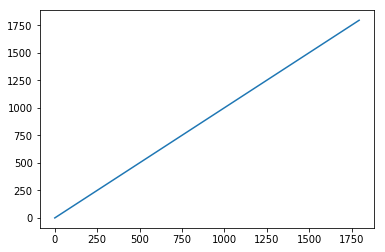

In [12]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id);

In [13]:
cacao.drop(['bar_id'], inplace = True, axis = 1)

### Company

In [14]:
pd.DataFrame(cacao.company.value_counts())

,company
,99
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
A. Morin,21
Valrhona,21
Arete,20
Hotel Chocolat (Coppeneur),18


### Задание 2.3.1
Сколько уникальных компаний содержится в датасете?

In [15]:
cacao.company.nunique() - 1 # есть пропуски

407

In [16]:
# **********************************************************************************

In [17]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

In [18]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum(), '\n')
cacao.loc[:, ['company']].info()

,company
Soma,45
Bonnat,26
Fresco,26
Pralus,25
Domori,22
A. Morin,21
Valrhona,21
Arete,20
Guittard,18
Hotel Chocolat (Coppeneur),18


Значений, встретившихся в столбце более 10 раз: 30 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
company    1696 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


### specific_origin


Давайте сделаем то же самое для столбца с местом происхождения какао-бобов. 

Сколько уникальных регионов в датасете?

In [19]:
cacao.specific_origin = cacao.specific_origin.apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(cacao.specific_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.specific_origin.value_counts()>10).sum(), '\n')
cacao.loc[:, ['specific_origin']].info()

,specific_origin
Madagascar,55
Peru,44
Ecuador,39
Dominican Republic,33
Venezuela,21
Sambirano,18
Chuao,18
Ocumare,16
Ghana,15
Papua New Guinea,15


Значений, встретившихся в столбце более 10 раз: 15 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
specific_origin    1737 non-null object
dtypes: object(1)
memory usage: 14.1+ KB


### Задание 2.3.2
Сколько уникальных регионов в датасете?

In [20]:
cacao.specific_origin.nunique()

1012

### Задание 2.3.3
Сколько значений, встретившихся в столбце более 10 раз?

In [21]:
(cacao.specific_origin.value_counts()>10).sum()

15

### ref
Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

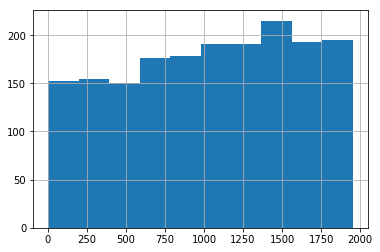

In [22]:
cacao.ref.hist(bins=10)
cacao.ref.describe()

Как видно, у этого признака нормальное распределение, выбросов нет. Заметен тренд на возрастание количества отзывов со временем (так как REF обозначает время внесения отзыва в базу). Интересно, почему так происходит?

### review_date

Этот столбец также числовой и у него также нет пропусков. Как ведет себя распределение этого признака?



count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

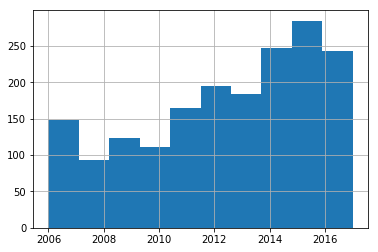

In [23]:
cacao.review_date.hist(bins=10)
cacao.review_date.describe()

### Задание 2.3.4
Содержит ли этот столбец выбросы?

### cocoa_percent


In [24]:
cacao.cocoa_percent[:10]

0     63%
1     70%
2    670%
3     70%
4     70%
5     70%
6     70%
7     70%
8     70%
9     70%
Name: cocoa_percent, dtype: object

In [25]:
cacao.cocoa_percent = cacao.cocoa_percent.apply(lambda x: float(x.replace('%', '')))

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

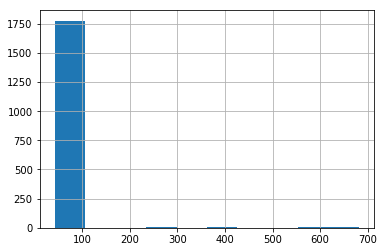

In [26]:
cacao.cocoa_percent.hist()
cacao.cocoa_percent.describe()

In [27]:
'''
Видим, что основное распределение лежит между  и  процентами и есть потенциальные выбросы свыше % 
(об этом нам говорит здравый смысл).
Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния 
(межквартильного размаха). Выбросом считаются такие значения, которые лежат вне рамок

percentile(25) -1.5*IQR : percentile(75)+1.5*IQR,  
где IQR = percentile(75) - percentile(25).''';

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


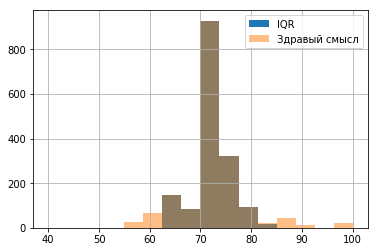

In [28]:
median = cacao.cocoa_percent.median()
IQR = cacao.cocoa_percent.quantile(0.75) - cacao.cocoa_percent.quantile(0.25)
perc25 = cacao.cocoa_percent.quantile(0.25)
perc75 = cacao.cocoa_percent.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.cocoa_percent.loc[cacao.cocoa_percent.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
cacao.cocoa_percent.loc[cacao.cocoa_percent <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();

In [29]:
cacao = cacao.loc[cacao.cocoa_percent <= 100]

### company_location


In [30]:
cacao.company_location


0          France
1          France
3          France
4          France
5          France
6          France
7          France
8          France
9          France
10         France
11         France
12         France
13         France
14         France
15         France
16         France
17         France
18         France
19         France
20         France
21         France
22         France
23         U.S.A.
24         U.S.A.
25           Fiji
          ...    
1769      Austria
1770      Austria
1771      Austria
1772      Austria
1773    Australia
1774    Australia
1775    Australia
1776    Australia
1777    Australia
1778      Austria
1779      Austria
1780      Austria
1781      Austria
1782      Austria
1783      Austria
1784      Austria
1786      Austria
1787      Austria
1788      Austria
1789      Austria
1790      Austria
1791      Austria
1792      Austria
1793      Austria
1794      Austria
Name: company_location, Length: 1776, dtype: object

In [31]:
display(pd.DataFrame(cacao.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.company_location.value_counts()>10).sum())
cacao.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
Ecuador,54
Australia,49
Belgium,39
Switzerland,38
Germany,35


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
company_location    1776 non-null object
dtypes: object(1)
memory usage: 27.8+ KB


### rating

In [32]:
cacao.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
6        3.50
7       11.50
8        3.75
9        4.00
10       2.75
11       3.00
12       3.25
13       3.75
14       2.75
15       3.00
16       3.25
17       4.00
18       3.25
19       3.50
20       4.00
21       3.50
22       3.75
23       3.75
24       3.75
25       2.75
        ...  
1769     2.75
1770     3.00
1771     3.50
1772     3.50
1773     3.75
1774     3.25
1775     3.50
1776     3.50
1777     3.75
1778     2.75
1779     3.50
1780     3.50
1781     3.00
1782     3.50
1783     3.75
1784     3.00
1786     3.25
1787     3.75
1788     3.25
1789     3.50
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

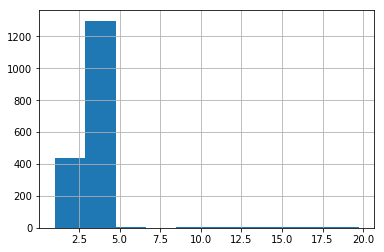

In [33]:
cacao.rating.hist()
cacao.rating.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


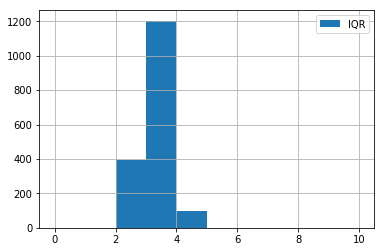

In [34]:
median = cacao.rating.median()
IQR = cacao.rating.quantile(0.75) - cacao.rating.quantile(0.25)
perc25 = cacao.rating.quantile(0.25)
perc75 = cacao.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
cacao.rating.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend();

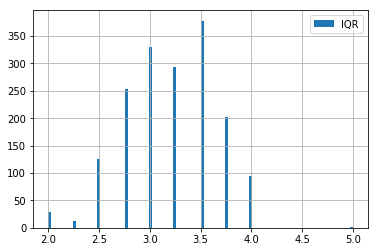

In [35]:
cacao.rating.loc[cacao.rating <=5].hist(bins = 100, range = (2, 5), 
                                                                                             label = 'IQR')
plt.legend();

In [36]:
cacao = cacao.loc[cacao.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

### bean_type

In [37]:
cacao.bean_type.isna().sum()

1

In [38]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [39]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum(),'\n')
print("Уникальных значений:", cacao.bean_type.nunique(),'\n')
cacao.loc[:, ['bean_type']].info()

,bean_type
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9
Forastero (Parazinho),8


Значений, встретившихся в столбце более 10 раз: 7 

Уникальных значений: 41 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    861 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [40]:
cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())

In [41]:
display(pd.DataFrame(cacao.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.bean_type.value_counts()>10).sum(),'\n')
print("Уникальных значений:", cacao.bean_type.nunique(),'\n')
cacao[['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
Matina,3
EET,3
Beniano,3


Значений, встретившихся в столбце более 10 раз: 5 

Уникальных значений: 21 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
bean_type    860 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


###  broad_origin


### Задание 2.4.1
Самостоятельно обработайте пропуски в этом столбце, заменив их на None, и ответьте на вопросы:

Сколько уникальных значений содержит столбец?

In [42]:
cacao.broad_origin.isna().sum()

1

In [43]:
cacao.broad_origin = \
cacao.broad_origin.astype(str).apply(lambda x: None if (x.strip()=='' or x.strip()=='nan') else x)
# or (x.strip() == 'nan')

In [44]:
#cacao.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
#                      else x if '(' not in x else x[:x.find('(')].strip())

In [45]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cacao.broad_origin.value_counts()>10).sum(),'\n')
print("Уникальных значений:", cacao.broad_origin.nunique(),'\n')
cacao[['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,159
Madagascar,138
Dominican Republic,135
Nicaragua,57
Brazil,57
Bolivia,53
Belize,49
Papua New Guinea,41


Значений, встретившихся в столбце более 10 раз: 25 

Уникальных значений: 96 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1630 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


Обратим внимание, что в столбце много повторяющихся значений с различным написанием. 

In [66]:
print(cacao.broad_origin.sort_values().unique())

['Africa, Carribean, C. Am.' 'Australia' 'Belize' 'Bolivia' 'Brazil'
 'Burma' 'Cameroon' 'Carribean' 'Carribean(DR/Jam/Tri)'
 'Central and S. America' 'Colombia' 'Colombia, Ecuador' 'Congo'
 'Cost Rica, Ven' 'Costa Rica' 'Cuba' 'DR, Ecuador, Peru'
 'Dom. Rep., Madagascar' 'Domincan Republic' 'Dominican Rep., Bali'
 'Dominican Republic' 'Ecuador' 'Ecuador, Costa Rica' 'Ecuador, Mad., PNG'
 'El Salvador' 'Fiji' 'Gabon' 'Ghana' 'Ghana, Domin. Rep'
 'Gre., PNG, Haw., Haiti, Mad' 'Grenada' 'Guat., D.R., Peru, Mad., PNG'
 'Guatemala' 'Haiti' 'Hawaii' 'Honduras' 'India' 'Indonesia'
 'Indonesia, Ghana' 'Ivory Coast' 'Jamaica' 'Liberia' 'Mad., Java, PNG'
 'Madagascar' 'Madagascar & Ecuador' 'Malaysia' 'Martinique' 'Mexico'
 'Nicaragua' 'Nigeria' 'PNG, Vanuatu, Mad' 'Panama' 'Papua New Guinea'
 'Peru' 'Peru(SMartin,Pangoa,nacional)' 'Peru, Belize' 'Peru, Dom. Rep'
 'Peru, Ecuador' 'Peru, Ecuador, Venezuela' 'Peru, Mad., Dom. Rep.'
 'Peru, Madagascar' 'Philippines' 'Principe' 'Puerto Rico' 'Samoa

Давайте это исправим, написав дополнительную функцию:

In [67]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [71]:
cacao.broad_origin = cacao.broad_origin.apply(fix_countries).sort_values()

In [72]:
display(pd.DataFrame(cacao.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cacao.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", cacao.broad_origin.nunique())
cacao.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
Nicaragua,57
Brazil,57
Bolivia,53
Belize,49
PapuaNewGuinea,41


Значений, упомянутых более 10 раз: 25
Уникальных значений: 93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
broad_origin    1630 non-null object
dtypes: object(1)
memory usage: 26.4+ KB


In [73]:
# *******************************************************************************

Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.

Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

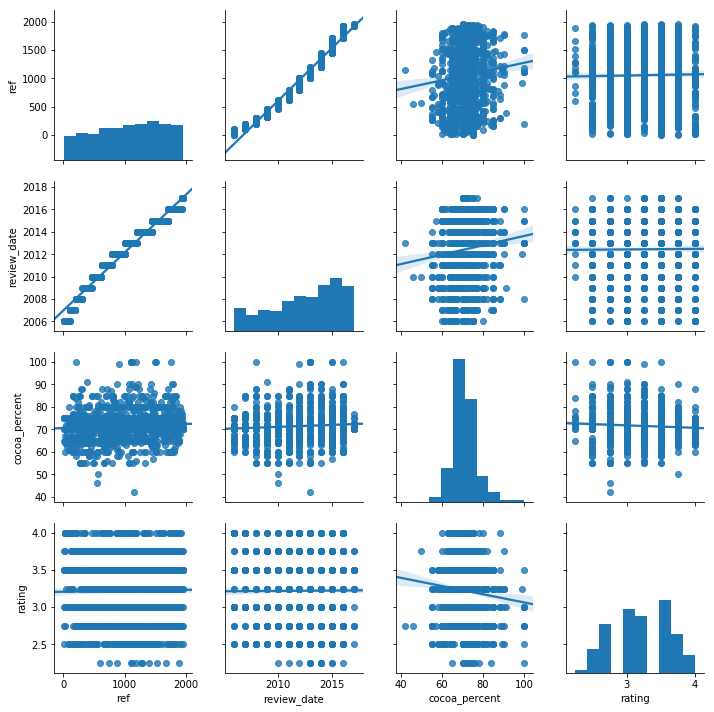

In [75]:
sns.pairplot(cacao, kind = 'reg');

Используем для наглядности матрицу корреляций:

In [76]:
cacao.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная REF.

Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

In [78]:
cacao.drop(['ref'], inplace = True, axis = 1)

cacao.corr()

,review_date,cocoa_percent,rating
review_date,1.000000,0.086523,0.006703
cocoa_percent,0.086523,1.000000,-0.078156
rating,0.006703,-0.078156,1.000000


Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

In [79]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cacao.loc[cacao.loc[:, column].isin(cacao.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

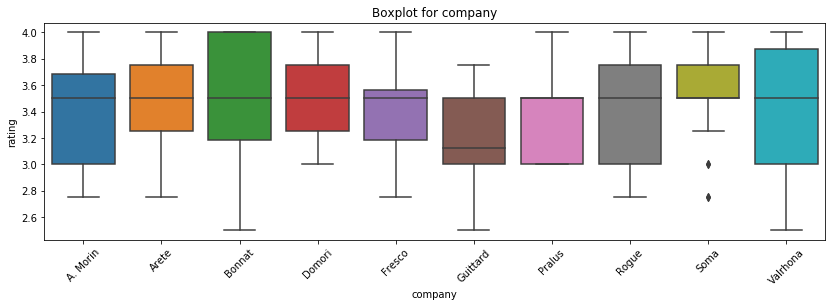

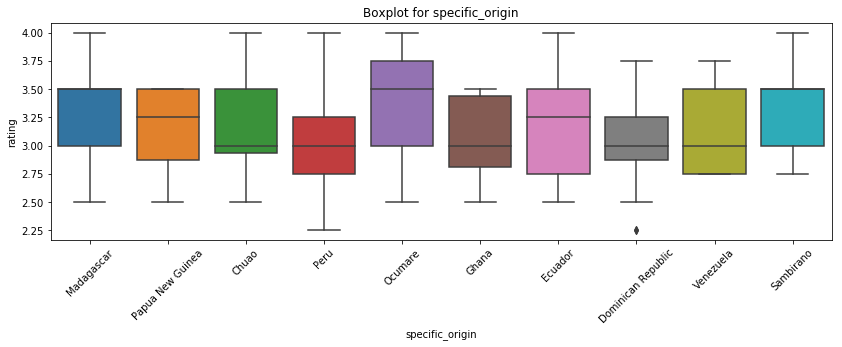

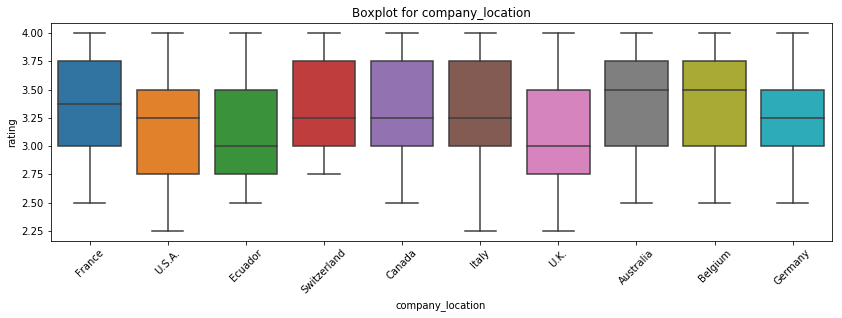

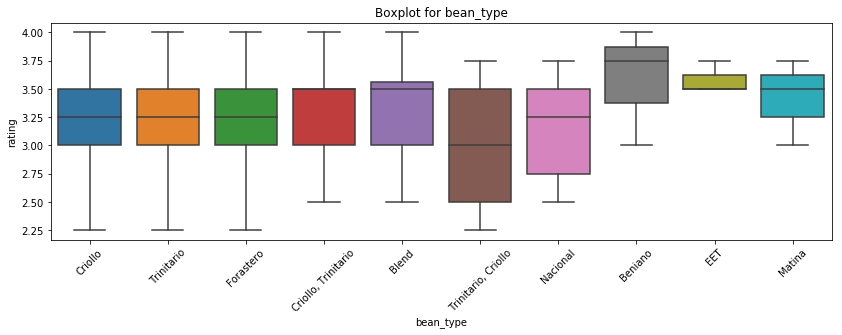

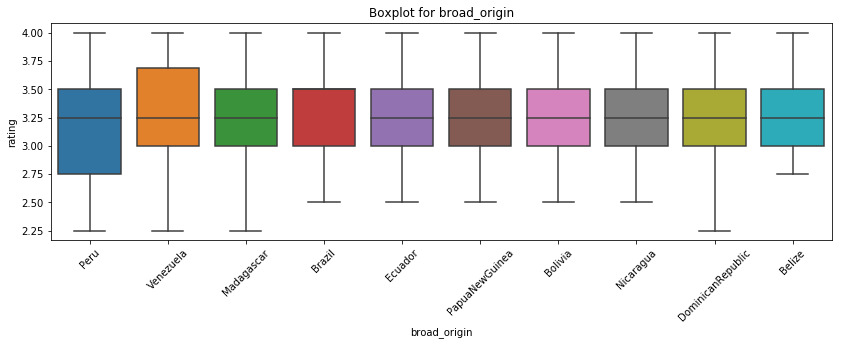

In [80]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [81]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [82]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


In [46]:
# *****************************  ПОДВАЛ *********************************************

In [47]:
cacao.columns

Index(['company', 'specific_origin', 'ref', 'review_date', 'cocoa_percent',
       'company_location', 'rating', 'bean_type', 'broad_origin'],
      dtype='object')

In [ ]:
def get_stat_dif(column):
    cols = cacao.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cacao.loc[cacao.loc[:, column] == comb[0], 'rating'], 
                        cacao.loc[cacao.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [87]:
column = ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']
cols = cacao.loc[:, column]#.value_counts().index[:10]
cols

,company,specific_origin,company_location,bean_type,broad_origin
1,A. Morin,Kpime,France,None,Togo
3,A. Morin,Akata,France,None,Togo
4,A. Morin,Quilla,France,None,Peru
5,A. Morin,Carenero,France,Criollo,Venezuela
6,A. Morin,Cuba,France,None,Cuba
8,None,Puerto Cabello,France,Criollo,Venezuela
9,A. Morin,Pablino,France,None,Peru
10,A. Morin,Panama,France,None,Panama
11,A. Morin,Madagascar,France,Criollo,Madagascar
12,A. Morin,Brazil,France,None,Brazil


In [ ]:
cols.value_counts()